# Предобработка данных

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [50]:
DATA_DIR = "data" # путь к данным

## Missing data (отсутствующие данные)

In [51]:
df_avito = pd.read_csv(os.path.join(DATA_DIR, 'avito.csv'))

В датасете находятся **NaN** - "**Not a Number**"

In [52]:
df_avito.tail()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
995,401d5fa8e55d,b5fe6a389cc4,Ярославская область,Ярославль,Хобби и отдых,Спорт и отдых,Игры с мячом,NaN,NaN,Продам бутсы Adidas,продам бутсы в отличном состоянии.отыграл 3 тр...,NaN,27,2017-03-27,Private,7c640fb4b6b4066c54e082193b66bedaedfee5e4d12975...,640.0,0.00000
996,4b136de2c16a,f57df929a284,Воронежская область,Воронеж,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,Продам диск lara croft на psp,NaN,350.0,142,2017-03-27,Company,0a7686a2e05ca2dc0470e550f1f03b1eddee7919d363ca...,2888.0,0.00000
997,a65090f39f50,8673d0037023,Свердловская область,Монетный,Недвижимость,"Дома, дачи, коттеджи",Продам,Коттедж,NaN,Коттедж 150 м² на участке 12 сот.,Продается чудесный коттедж в экологически чист...,5900000.0,5830,2017-03-18,Shop,9061df217dd8f2b338e2645d52b09af6143677d011002a...,1376.0,0.07725
998,53e0aa75cecd,fbfe3f73586d,Башкортостан,Ишимбай,Транспорт,Автомобили,С пробегом,Hyundai,i30,"Hyundai i30, 2012",Продается автомобиль Hyundai i30. Был куплен ...,550000.0,1,2017-03-20,Private,c7fe551884576cb8b1bb9bbfe216b3e0b437d6b2208deb...,1118.0,0.10521
999,211a7d242f97,b3e017bd61eb,Самарская область,Самара,Для дома и дачи,Ремонт и строительство,Окна и балконы,NaN,NaN,Породам окно,"Глухое 1кам32 с.пакет, ш650в1440. Новое не под...",2000.0,32,2017-03-24,Private,a68483a58dfbf3b7abf95dfe623651aa45dc211dbb2992...,1405.0,0.00000


In [53]:
df_avito['price'].iloc[995]

nan

Что если выбрать все экземпляры, где price != np.nan?

In [54]:
items_with_price = df_avito[df_avito['price'] != np.nan]

Нет, это не работает - количество экземпляров осталось прежним

In [55]:
print("df_avito.shape: {}".format(df_avito.shape))
print("items_with_price.shape: {}".format(items_with_price.shape))

df_avito.shape: (1000, 18)
items_with_price.shape: (1000, 18)


Магия NaN:

In [56]:
print("np.nan == np.nan: {}".format(np.nan == np.nan))
print("np.nan != np.nan: {}".format(np.nan != np.nan))

np.nan == np.nan: False
np.nan != np.nan: True


In [57]:
df_avito['price'].isna() # True при NaN, False при наличии значения

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979     True
980    False
981    False
982    False
983    False
984    False
985     True
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994     True
995     True
996    False
997    False
998    False
999    False
Name: price, Length: 1000, dtype: bool

In [58]:
np.sum(df_avito['price'].isna()) # подсчёт всех nan в колонке price

65

In [59]:
df_avito['price'].notna() # обратная к isna() функция

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25      True
26      True
27      True
28      True
29      True
       ...  
970     True
971     True
972     True
973     True
974     True
975     True
976     True
977     True
978     True
979    False
980     True
981     True
982     True
983     True
984     True
985    False
986     True
987     True
988     True
989     True
990     True
991     True
992     True
993     True
994    False
995    False
996     True
997     True
998     True
999     True
Name: price, Length: 1000, dtype: bool

In [60]:
df_without_nan = df_avito.loc[df_avito['price'].notna()]
print("df_without_nan.shape: {}".format(df_without_nan.shape))

df_without_nan.shape: (935, 18)


In [61]:
df_avito.isna().sum() # подсчёт всех NaN по колонкам

item_id                   0
user_id                   0
region                    0
city                      0
parent_category_name      0
category_name             0
param_1                  44
param_2                 447
param_3                 594
title                     0
description              67
price                    65
item_seq_number           0
activation_date           0
user_type                 0
image                    79
image_top_1              79
deal_probability          0
dtype: int64

In [62]:
df_avito.isna().sum().sum() # подсчёт всех NaN в датасете

1375

**NaN работает как вирус - любое арифметическое выражение с NaN равно NaN**

In [63]:
print("np.nan + 1 = {}".format(np.nan + 1))
print("np.nan - 1 = {}".format(np.nan - 1))
print("np.nan * 1 = {}".format(np.nan * 1))
print("np.nan / 1 = {}".format(np.nan / 1))
print("np.sum([np.nan, 1]) = {}".format(np.sum([np.nan, 1])))
arr = np.array([np.nan, 1, 2, 3, np.nan])
print("arr.sum() = {}".format(arr.sum()))

np.nan + 1 = nan
np.nan - 1 = nan
np.nan * 1 = nan
np.nan / 1 = nan
np.sum([np.nan, 1]) = nan
arr.sum() = nan


**Первый вариант - сброс рядов со значениями NaN**

In [64]:
df_avito['price'].dropna() # сброс рядов со значениями NaN 

0          400.0
1         3000.0
2         4000.0
3         2200.0
4        40000.0
5         1300.0
6        11000.0
7          500.0
8          500.0
9          400.0
10       18000.0
11           1.0
12          70.0
13        2500.0
14        5000.0
15         800.0
16      140000.0
17         500.0
18        1000.0
19      100000.0
20     1748000.0
21        2600.0
22      249000.0
23        1300.0
25        1500.0
26        1000.0
27        1500.0
28        1000.0
29         200.0
31         130.0
         ...    
965        250.0
966     189000.0
967        800.0
968        250.0
970        500.0
971       1580.0
972       3000.0
973        400.0
974      11500.0
975        500.0
976    1600000.0
977    1650000.0
978     560000.0
980        250.0
981      10000.0
982        250.0
983       1000.0
984        300.0
986       4200.0
987        200.0
988        700.0
989        150.0
990      12000.0
991          1.0
992       2300.0
993        650.0
996        350.0
997    5900000

**Второй вариант - подставить среднее значение по колонке**

Возможно ли посчитать среднее, не используя .mean()?

In [65]:
df_avito['price'].sum()

269889239.0

In [66]:
df_avito['price'].sum(skipna=False)

nan

**Среднее значение отличается при разных подходах, так как shape учитывает ряды с NaN (надо использовать функцию mean)**

In [67]:
print("df_avito['price'].sum() / df_avito.shape[0]): {}".format(df_avito['price'].sum() / df_avito.shape[0]))
print("df_avito['price'].mean(): {}".format(df_avito['price'].mean()))

df_avito['price'].sum() / df_avito.shape[0]): 269889.239
df_avito['price'].mean(): 288651.592513369


In [68]:
df_avito['price'].mean(skipna=False)

nan

In [69]:
df_avito['price'].fillna(0) # заполнение NaN значением

0          400.0
1         3000.0
2         4000.0
3         2200.0
4        40000.0
5         1300.0
6        11000.0
7          500.0
8          500.0
9          400.0
10       18000.0
11           1.0
12          70.0
13        2500.0
14        5000.0
15         800.0
16      140000.0
17         500.0
18        1000.0
19      100000.0
20     1748000.0
21        2600.0
22      249000.0
23        1300.0
24           0.0
25        1500.0
26        1000.0
27        1500.0
28        1000.0
29         200.0
         ...    
970        500.0
971       1580.0
972       3000.0
973        400.0
974      11500.0
975        500.0
976    1600000.0
977    1650000.0
978     560000.0
979          0.0
980        250.0
981      10000.0
982        250.0
983       1000.0
984        300.0
985          0.0
986       4200.0
987        200.0
988        700.0
989        150.0
990      12000.0
991          1.0
992       2300.0
993        650.0
994          0.0
995          0.0
996        350.0
997    5900000

In [70]:
df_avito['price'] = df_avito['price'].fillna(df_avito['price'].mean())

**Заполнение NaN для датасета с временным индексом**

In [71]:
arr_ts = [
    0.469112,
    np.nan,
    -5.689738,
    np.nan,
    -8.916232
]
dates = [
    pd.Timestamp('2000-01-31'),
    pd.Timestamp('2000-02-29'),
    pd.Timestamp('2002-07-31'),
    pd.Timestamp('2005-01-31'),
    pd.Timestamp('2008-04-30')
]

ts = pd.Series(arr_ts, index=dates)
ts

2000-01-31    0.469112
2000-02-29         NaN
2002-07-31   -5.689738
2005-01-31         NaN
2008-04-30   -8.916232
dtype: float64

In [72]:
ts.interpolate()

2000-01-31    0.469112
2000-02-29   -2.610313
2002-07-31   -5.689738
2005-01-31   -7.302985
2008-04-30   -8.916232
dtype: float64

In [73]:
ts.interpolate(method='time')

2000-01-31    0.469112
2000-02-29    0.273271
2002-07-31   -5.689738
2005-01-31   -7.095568
2008-04-30   -8.916232
dtype: float64

## Standardization (стандартизация)

Данные о квартирах - площадь и цена

In [109]:
df_apts = pd.read_csv(os.path.join(DATA_DIR, 'apt_prices.csv'))
print("df_apts.shape: {}".format(df_apts.shape))
df_apts.head()

df_apts.shape: (175, 2)


,X1,X2
0,57.565811,4.458676e+06
1,38.980196,1.996861e+06
2,47.248367,3.803824e+06
3,50.910823,3.435008e+06
4,67.741659,4.431305e+06


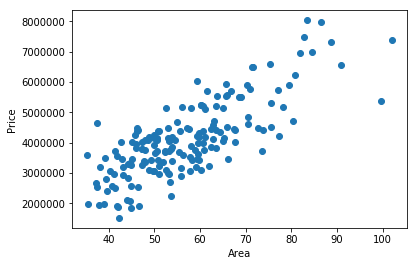

In [110]:
plt.plot(df_apts['X1'], df_apts['X2'], 'o')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

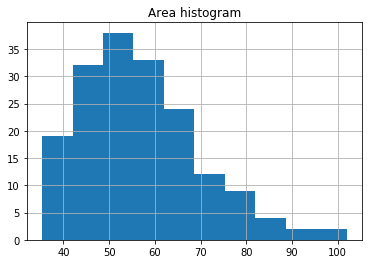

In [114]:
df_apts['X1'].hist()
plt.title("Area histogram")
plt.show()

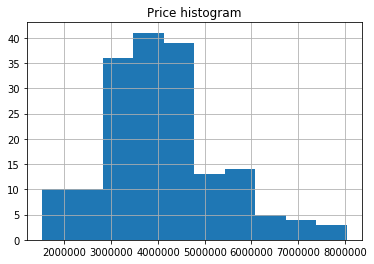

In [115]:
df_apts['X2'].hist()
plt.title("Price histogram")
plt.show()

**Если построить две гистограммы вместе, виден разброс амплитуд**

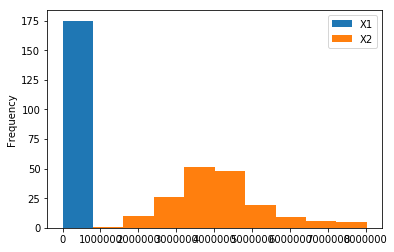

In [116]:
df_apts.plot.hist()

**Нормализация**

Привести распределение к амплитуде [0, 1]

$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

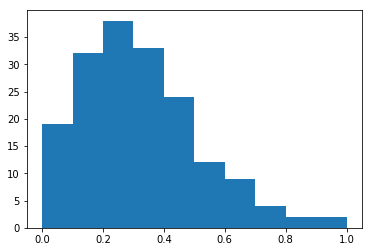

In [117]:
plt.hist((df_apts['X1'] - df_apts['X1'].min()) / (df_apts['X1'].max() - df_apts['X1'].min()))
plt.show("Standardization")
plt.show()

**Стандартизация**

Привести распределение к среднему, равному 0 и стандартному отклонению, равному 1

$$X_{changed} = \frac{X - \mu}{\sigma}$$

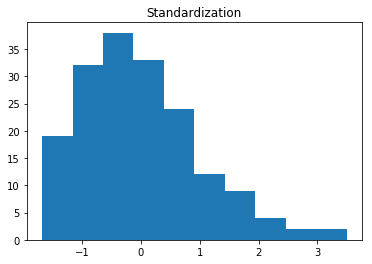

In [118]:
plt.hist((df_apts['X1'] - df_apts['X1'].mean()) / df_apts['X1'].std())
plt.title("Standardization")
plt.show()

**В чём разница между нормализацией и стандартизацией?**

In [119]:
df_apts["X1"].loc[174] = 20000 # добавим аномальный экземпляр

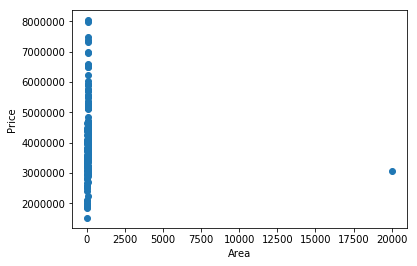

In [120]:
plt.plot(df_apts['X1'], df_apts['X2'], 'o')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

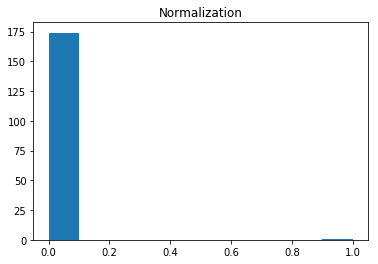

In [121]:
plt.hist((df_apts['X1'] - df_apts['X1'].min()) / (df_apts['X1'].max() - df_apts['X1'].min()))
plt.title("Normalization")
plt.show()

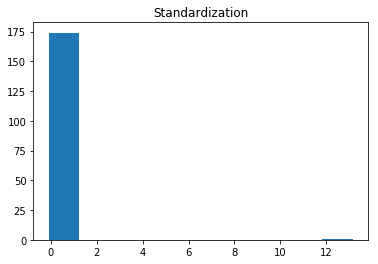

In [122]:
plt.hist((df_apts['X1'] - df_apts['X1'].mean()) / df_apts['X1'].std())
plt.title("Standardization")
plt.show()

## One-hot encoding (one-hot кодирование)

In [141]:
df_avito.tail()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
995,401d5fa8e55d,b5fe6a389cc4,Ярославская область,Ярославль,Хобби и отдых,Спорт и отдых,Игры с мячом,NaN,NaN,Продам бутсы Adidas,продам бутсы в отличном состоянии.отыграл 3 тр...,2.886516e+05,27,2017-03-27,Private,7c640fb4b6b4066c54e082193b66bedaedfee5e4d12975...,640.0,0.00000
996,4b136de2c16a,f57df929a284,Воронежская область,Воронеж,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,Продам диск lara croft на psp,NaN,3.500000e+02,142,2017-03-27,Company,0a7686a2e05ca2dc0470e550f1f03b1eddee7919d363ca...,2888.0,0.00000
997,a65090f39f50,8673d0037023,Свердловская область,Монетный,Недвижимость,"Дома, дачи, коттеджи",Продам,Коттедж,NaN,Коттедж 150 м² на участке 12 сот.,Продается чудесный коттедж в экологически чист...,5.900000e+06,5830,2017-03-18,Shop,9061df217dd8f2b338e2645d52b09af6143677d011002a...,1376.0,0.07725
998,53e0aa75cecd,fbfe3f73586d,Башкортостан,Ишимбай,Транспорт,Автомобили,С пробегом,Hyundai,i30,"Hyundai i30, 2012",Продается автомобиль Hyundai i30. Был куплен ...,5.500000e+05,1,2017-03-20,Private,c7fe551884576cb8b1bb9bbfe216b3e0b437d6b2208deb...,1118.0,0.10521
999,211a7d242f97,b3e017bd61eb,Самарская область,Самара,Для дома и дачи,Ремонт и строительство,Окна и балконы,NaN,NaN,Породам окно,"Глухое 1кам32 с.пакет, ш650в1440. Новое не под...",2.000000e+03,32,2017-03-24,Private,a68483a58dfbf3b7abf95dfe623651aa45dc211dbb2992...,1405.0,0.00000


In [142]:
type(df_avito['activation_date'][0])

str

In [143]:
df_avito.nunique()

item_id                 1000
user_id                  997
region                    28
city                     190
parent_category_name       9
category_name             46
param_1                  146
param_2                   94
param_3                   90
title                    944
description              929
price                    249
item_seq_number          287
activation_date           14
user_type                  3
image                    921
image_top_1              567
deal_probability         229
dtype: int64

In [145]:
pd.get_dummies(df_avito['category_name']).head()

,Автомобили,Аквариум,Аудио и видео,Билеты и путешествия,Бытовая техника,Велосипеды,Водный транспорт,Гаражи и машиноместа,Готовый бизнес,Грузовики и спецтехника,...,Растения,Ремонт и строительство,Собаки,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_avito = pd.concat([df_avito.drop(['category_name'], axis=1), pd.get_dummies(df_avito['category_name'])], axis=1)

In [91]:
df_avito.head()

,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,...,Растения,Ремонт и строительство,Собаки,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",...,0,0,0,0,0,1,0,0,0,0
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",...,0,0,0,0,0,0,0,0,0,0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",...,0,0,0,0,0,0,0,0,0,0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,...,0,0,0,0,0,1,0,0,0,0
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,...,0,0,0,0,0,0,0,0,0,0


## Decomposition (декомпозиция)

In [92]:
df_avito.head()

,item_id,user_id,region,city,parent_category_name,param_1,param_2,param_3,title,description,...,Растения,Ремонт и строительство,Собаки,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",...,0,0,0,0,0,1,0,0,0,0
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",...,0,0,0,0,0,0,0,0,0,0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",...,0,0,0,0,0,0,0,0,0,0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,...,0,0,0,0,0,1,0,0,0,0
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from datetime import datetime

In [94]:
weekdays = []
for x in df_avito['activation_date']:
    weekdays.append(datetime.strptime(x, "%Y-%m-%d").weekday())
weekdays = np.array(weekdays)
is_weekend = (weekdays >= 5).astype(int)
is_weekend

## Aggregation (агрегация)

In [99]:
df_apts_new = df_apts.drop('X1', axis=1)
df_apts_new.shape

(175, 1)

In [100]:
# df_apts['X2'].shape
length_width = np.random.randint(low=3, high=20, size=(175, 2))
length_width.shape
df_apts_new = pd.DataFrame(length_width, columns=['length', 'width'])
df_apts_new = pd.concat([df_apts_new, df_apts['X2']], axis=1)
df_apts_new

,length,width,X2
0,9,17,4.458676e+06
1,3,18,1.996861e+06
2,5,16,3.803824e+06
3,6,7,3.435008e+06
4,7,13,4.431305e+06
5,9,19,4.033624e+06
6,7,16,5.185875e+06
7,13,11,3.455775e+06
8,6,8,4.394154e+06
9,3,7,3.775538e+06


In [101]:
df_apts_new['area'] = df_apts_new['length'] * df_apts_new['width']
df_apts_new = df_apts_new.drop(['length', 'width'], axis=1)

In [102]:
df_apts_new.head()

,X2,area
0,4.458676e+06,153
1,1.996861e+06,54
2,3.803824e+06,80
3,3.435008e+06,42
4,4.431305e+06,91


## Test set

In [ ]:
df = pd.read_csv('train.csv')
df.head()

In [ ]:
df.shape

In [ ]:
X_train = df.drop('medv', axis=1).values[:300]
Y_train = df['medv'].values[:300]

X_test = df.drop('medv', axis=1).values[300:]
Y_test = df['medv'].values[300:]
Y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

mdl.fit(X_train, Y_train)

In [ ]:
Y_pred = mdl.predict(X_test)
Y_pred

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_pred, Y_test)

In [ ]:
Y_pred_test = mdl.predict(X_train)
explained_variance_score(Y_pred_test, Y_train)